In [31]:

from pandas_profiling import ProfileReport
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('songs_normalize.csv', on_bad_lines='skip', encoding='UTF-8',sep=',')
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [ ]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

1. Describa el conjunto de datos, tipos de variables y destaque cualquier problema de calidad de datos y procesos de limpieza que deba implementar.

El conjunto de datos muestra información de Spotify acerca de diferentes canciones, donde por medio de 18 características, pretende describirlas y entender el comportamientos de las mismas. El conjunto de datos posee 5 variables categóricas:
Artist, Song,  mode, genre y explicit (que también puede ser denominada booleana)
y 13 numéricas:
duration_ms, year, popularity, danceability, energy, key, loudness, speechiness, acousticness, instrumentalness, liveness, valence y tempo

Actualmente, se evidencia un % de duplicados igual a 2.9%, es decir 59 filas, por lo cual es necesario quitarlos

In [21]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)


1. ¿Cuál es el top 10 de artistas más activos de los últimos 10 años?

Este es el top 10 de artistas, con su respectiva cantidad de canciones, Rihanna y Drake son los más activos con 23 canciones y los más inactivos son Beyoncé, Kanye, Taylor S y Chris con 16 canciones cada uno

[Text(0, 0, '23'),
 Text(0, 0, '23'),
 Text(0, 0, '21'),
 Text(0, 0, '20'),
 Text(0, 0, '19'),
 Text(0, 0, '18'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '16')]

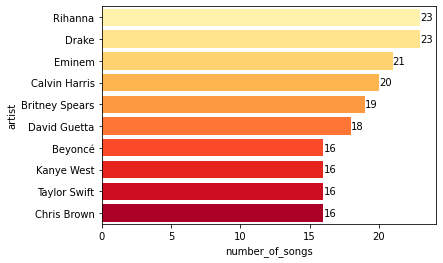

In [66]:
a = df.groupby('artist').agg(number_of_songs=('song', 'count')).reset_index().sort_values(by = 'number_of_songs', ascending=False).head(10)

b=sns.barplot(data = a , x='number_of_songs', y='artist', palette ="YlOrRd", saturation= 1)
b.bar_label(b.containers[0])

2. ¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con su duración? Halle la diferencia del tiempo promedio de ambos géneros.
No presentan una diferencia significativa, la diferencia % de Folk/Acoustic - Latin es de 3%

In [82]:
print(df[df["genre"].str.contains("Folk/Acoustic")]['duration_ms'].mean())
print(df[df["genre"].str.contains("latin")]['duration_ms'].mean())
print(df[df["genre"].str.contains("Folk/Acoustic")]['duration_ms'].mean() - df[df["genre"].str.contains("latin")]['duration_ms'].mean())
print((df[df["genre"].str.contains("Folk/Acoustic")]['duration_ms'].mean() - df[df["genre"].str.contains("latin")]['duration_ms'].mean())/df[df["genre"].str.contains("Folk/Acoustic")]['duration_ms'].mean())


220183.65
227494.68253968254
-7311.03253968255
-0.03320424808873207


3. Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019?
La cantidad de canciones del top 5 de los géneros musicales no representan un comportamiento definido, lo que si parece tener una tendencia creciente es la concentración de canciones en el top 5, dado que en el 2000, el top 5 de géneros poseían el 62% de las canciones y en el 2019 el 76%, un crecimiento de 14%. Igualemnte, se evidencia que el Pop siempre se ha mantenido como uno de los géneros favoritos y que el Hip hop es un género que ha cobrado mayor popularidad a medida que pasa el tiempo

2000 44 de 71 0.6197183098591549
2005 67 de 101 0.6633663366336634
2010 80 de 103 0.7766990291262136
2015 68 de 93 0.7311827956989247
2019 68 de 89 0.7640449438202247


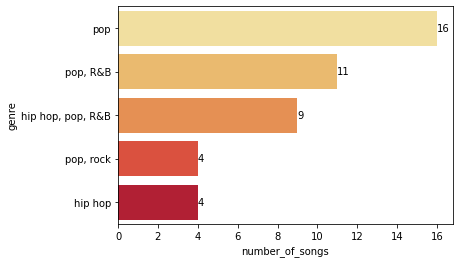

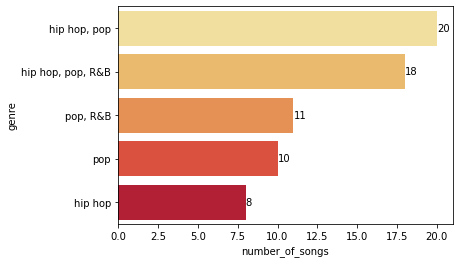

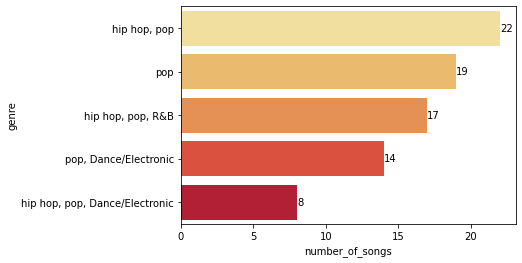

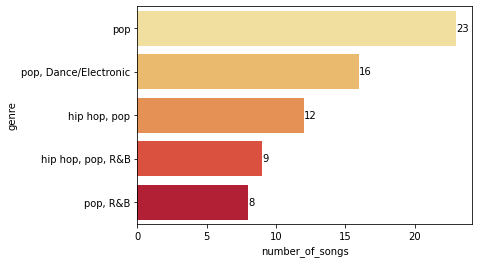

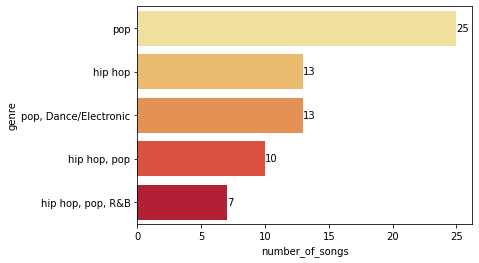

In [95]:
years = [2000, 2005, 2010, 2015, 2019]

for i in years:
    a = df[df.year==i].groupby('genre').agg(number_of_songs=('song', 'count')).reset_index().sort_values(by = 'number_of_songs', ascending=False).head(5)
    print(str(i)+' '+str(a.number_of_songs.sum())+' de '+str(df[df.year==i]['song'].count())+' '+str(a.number_of_songs.sum()/df[df.year==i]['song'].count()) )
    plt.figure()
    b=sns.barplot(data = a , x='number_of_songs', y='genre', palette ="YlOrRd")
    b.bar_label(b.containers[0])


4. ¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.

Se calculó la edad del artista en el mercado teniendo en cuenta el año en el que aparecen por primera vez, asumiendo que el 1998 es el primer año y que si no aparecen en ese año, no lo hacen antes. Se evidencia un comportamiento con tendencia creciente, omitiría las edades despues 12 años, dado que son pocos artistas los que cumplen con estas características, lo cuál hace muy volátil el comportamiento.
Igualmente, se evidencia un comportamiento estacional, lo cual tiene sentido, pues los artistas no tienden a sacar canciones de debut todos los años , sino que tienen periodos cortos de descanso. Adicionalmente, se identifica que a medida que trasncurre el tiempo, los cambios entre picos y valles son más grandes.

<AxesSubplot:xlabel='edad', ylabel='popularity_evol'>

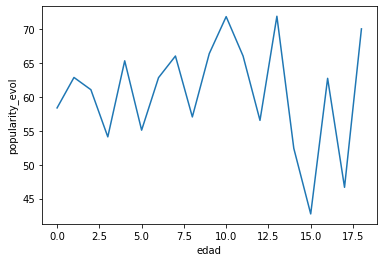

In [135]:
a = df.groupby('artist').agg(primera_vez=('year', 'min')).reset_index()
a = a[a.primera_vez>1998]

df2= df.merge(a, how= 'left', left_on='artist', right_on='artist')

df2['edad']=df2['year']-df2['primera_vez']
a=df2.groupby('edad').agg(popularity_evol=('popularity', 'mean')).reset_index()
sns.lineplot(data=a, x='edad', y='popularity_evol')

In [141]:
df2.groupby('edad').agg(conteo=('popularity', 'count')).reset_index()

,edad,conteo
0,0.0,1049
1,1.0,141
2,2.0,184
3,3.0,114
4,4.0,105
5,5.0,72
6,6.0,70
7,7.0,43
8,8.0,31
9,9.0,34


5. Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre la gráfica, ej: ¿existen tendencias?

Para hacer este análisis se tomaron los 5 géneros más poplares en la historia y se decidió hacer una parametrización de donde apareciá cada género.
Nuevamente, se evidencia el tema de los comportamentos estacionales, dónde frecuentemente se identifican valles en años posteriores a picos.

De igual forma, se evidencia que en general los géneros poseen un mismo comportamiento, exceptuando el Rock que en varios años muestra comportamientos antagonista,en lo cual se puede entender que se comporta como género complementario, es decir, cuando toma protagonista, los otros, el rock la pierden y viceversa. Igualmente, se evidencia una caida de popularidad en los últimos años para todos los géneros, lo cual se puede leer como una adhesión a otros géneros diferentes a los que existen hace 20 años.

In [174]:
a = df.groupby('genre').agg(number_of_songs=('song', 'count')).reset_index().sort_values(by = 'number_of_songs', ascending=False).head(10)
a


,genre,number_of_songs
30,pop,416
19,"hip hop, pop",267
21,"hip hop, pop, R&B",236
31,"pop, Dance/Electronic",216
33,"pop, R&B",172
14,hip hop,121
20,"hip hop, pop, Dance/Electronic",75
44,rock,57
0,Dance/Electronic,41
54,"rock, pop",39


In [183]:
a = df2[df2["genre"].str.contains("pop")].groupby(['year']).agg(popularity_evol=('popularity', 'mean')).reset_index()
a['genre']= 'pop'

b = df2[df2["genre"].str.contains("hip hop")].groupby(['year']).agg(popularity_evol=('popularity', 'mean')).reset_index()
b['genre']= 'hip hop'

c = df2[df2["genre"].str.contains("R&B")].groupby(['year']).agg(popularity_evol=('popularity', 'mean')).reset_index()
c['genre']= 'R&B'

d = df2[df2["genre"].str.contains("Dance/Electronic")].groupby(['year']).agg(popularity_evol=('popularity', 'mean')).reset_index()
d['genre']= 'Dance/Electronic'

e = df2[df2["genre"].str.contains("rock")].groupby(['year']).agg(popularity_evol=('popularity', 'mean')).reset_index()
e['genre']= 'rock'



#b = df2[(df2.year<2010) & (df2.year>=2005)].groupby(['year','edad',]).agg(popularity_evol=('popularity', 'mean')).reset_index()
#c = df2[(df2.year>=2010) & (df2.year<2015)].groupby(['year','edad',]).agg(popularity_evol=('popularity', 'mean')).reset_index()
#d = df2[df2.year>=2015].groupby(['year','edad',]).agg(popularity_evol=('popularity', 'mean')).reset_index()

"\nplt.figure()\nsns.lineplot(data=b, x='edad', y='popularity_evol', hue= 'year')\nplt.figure()\nsns.lineplot(data=c, x='edad', y='popularity_evol', hue= 'year')\nplt.figure()\nsns.lineplot(data=d, x='edad', y='popularity_evol', hue= 'year')\n"

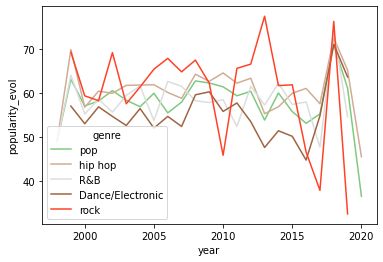

In [189]:

sns.lineplot(data=a, x='year', y='popularity_evol',hue='genre',palette='Accent')
sns.lineplot(data=b, x='year', y='popularity_evol',hue='genre',palette='pink')
sns.lineplot(data=c, x='year', y='popularity_evol',hue='genre',palette='coolwarm_r')
sns.lineplot(data=d, x='year', y='popularity_evol',hue='genre',palette='copper')
sns.lineplot(data=e, x='year', y='popularity_evol',hue='genre',palette='CMRmap')


6. Compare los géneros Pop y Rock según sus características de: energy, valence y tempo. Concluya sobre su análisis.

Se evidencia que las diferencias en energy, valence y tempo anteriormente eran mayores pero con el pasar de los años han ido convergiendo a puntos parecidos. Nuevamente, rock es el género que presenta una mayores cambios a medida que pasa el tiempo, siendo pop el género que se ha mantenido más constante en las tres variables.

Del mismo modo, se identifica que en términos generales energy tiende  a ser más alto para rock que para pop, lo cual tiene sentido por el tipo de género
Para el caso de valence y tempo las diferencias no son tan marcadas

In [191]:
a = df2[df2["genre"].str.contains("pop")].groupby(['year']).agg(energy=('energy', 'mean'),valence=('valence', 'mean'),tempo=('tempo', 'mean')).reset_index()
a['genre']= 'pop'


b = df2[df2["genre"].str.contains("rock")].groupby(['year']).agg(energy=('energy', 'mean'),valence=('valence', 'mean'),tempo=('tempo', 'mean')).reset_index()
b['genre']= 'rock'

<AxesSubplot:xlabel='year', ylabel='tempo'>

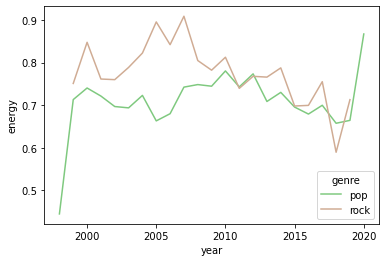

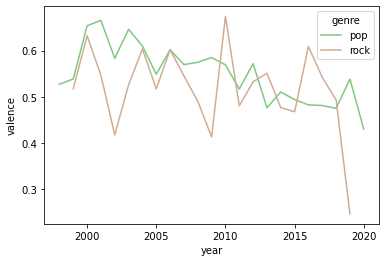

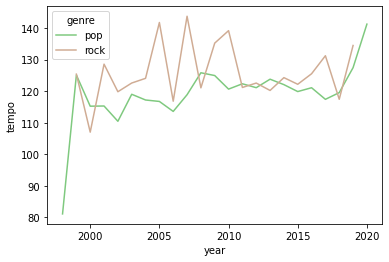

In [194]:
plt.figure()
sns.lineplot(data=a, x='year', y='energy',hue='genre',palette='Accent')
sns.lineplot(data=b, x='year', y='energy',hue='genre',palette='pink')
plt.figure()
sns.lineplot(data=a, x='year', y='valence',hue='genre',palette='Accent')
sns.lineplot(data=b, x='year', y='valence',hue='genre',palette='pink')
plt.figure()
sns.lineplot(data=a, x='year', y='tempo',hue='genre',palette='Accent')
sns.lineplot(data=b, x='year', y='tempo',hue='genre',palette='pink')

7. Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.

Cómo ha afectado la existencia de Britney Spears a la música en general y al pop, teniendo en cuenta popularidad, danceability y trascurso del tiempo?

Tener en cuenta que se están teniendo en cuenta variables como artista, género, popularidad, danceability y años

Se evidencia  que Britney siempre tuvo una popularidad mayor al promedio del género Pop y de General, de igual forma se evidencia el impacto de su vida personal en su carrera profesional, donde aunque hasta el 2013 tuvo una gran popularidad, posteriormente no siguió produciendo musica,

De igual forma, el tipo de música de Britney aunque es categorizada como Pop, tiene un promedio de danzabilidad mucho más alto que este género, lo cual puede ser un poco su exito


In [197]:
a = df2[df2['artist'].str.contains("Britney")].groupby(['year']).agg(popularity=('popularity', 'mean'),danceability=('danceability', 'mean')).reset_index()
a['compare']= 'Britney'

b = df2[df2['genre'].str.contains("pop")].groupby(['year']).agg(popularity=('popularity', 'mean'),danceability=('danceability', 'mean')).reset_index()
b['compare']= 'Pop'

c = df2.groupby(['year']).agg(popularity=('popularity', 'mean'),danceability=('danceability', 'mean')).reset_index()
c['compare']= 'general'


In [201]:
a

,year,popularity,danceability,compare
0,1999,58.000000,0.633000,Britney
1,2000,71.000000,0.758000,Britney
2,2001,62.666667,0.687667,Britney
3,2003,67.666667,0.658667,Britney
4,2004,53.000000,0.749000,Britney
5,2007,68.000000,0.756333,Britney
6,2008,73.000000,0.744000,Britney
7,2011,65.500000,0.694500,Britney
8,2013,0.000000,0.630000,Britney


<AxesSubplot:xlabel='year', ylabel='danceability'>

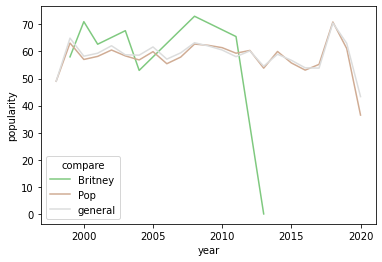

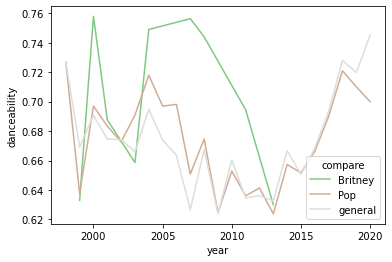

In [200]:
plt.figure()
sns.lineplot(data=a, x='year', y='popularity',hue='compare',palette='Accent')
sns.lineplot(data=b, x='year', y='popularity',hue='compare',palette='pink')
sns.lineplot(data=c, x='year', y='popularity',hue='compare',palette='coolwarm_r')


plt.figure()
sns.lineplot(data=a, x='year', y='danceability',hue='compare',palette='Accent')
sns.lineplot(data=b, x='year', y='danceability',hue='compare',palette='pink')
sns.lineplot(data=c, x='year', y='danceability',hue='compare',palette='coolwarm_r')

In [ ]:
/dbfs/FileStore/shared_uploads/s.novoa1129@gmail.com/645_20170904091816-1.zip

dbfs:/FileStore/shared_uploads/s.novoa1129@gmail.com/645_20170904091816-1.zip